# Lecture 15

* Labs: best way to study. Many didn't complete the assignments. Some had copied other's. 
    * New Rule: if you copy, you must site. Ideally link to GitHub in your solution.
        * When you copy, the question is not longer counted in the demoninator of your grade... until 50%.
    * Use this as a means of studying. Turn in Wednesday.
    * Just submit new versions of the previous labs, and it will be regraded. 
    

    


## Solve some problems together

1. What is the output of the following cell?


In [2]:
my_list=[1,2,3,4,5,4,3,2,1]

def arg_max(d):
    a_max=d[0]
    i_max=0
    for i,e in enumerate(d):
        if e>a_max:
            a_max=e
            i_max=i
    return i_max

print(max(my_list),arg_max(my_list))

5 4


In [3]:
def arg_min(d):
    a_min=d[0]
    i_min=0
    for i,e in enumerate(d):
        if e<a_min:
            a_min=e
            i_min=i
    return i_min

print(min(my_list),arg_min(my_list))

1 0


2. What would be `arg_min(my_list)` return if it was modified to return a list of the indexes of all values that are max. 

3. Do the modification:

In [13]:
def arg_min(lst):
    out=list()
    
    min_val=lst[0]
    min_index=0
    for i,val in enumerate(lst):
        if val<min_val:
            min_val=val
            min_index=i
            out=list()
            out.append(i)
        elif val==min_val:
            out.append(i)
            
    return out


In [16]:
arg_min([2,2,1,2,3,1,1])

[2, 5, 6]

4. Recall `zero_matrix` from last lecture. Write a function called `one_matrix(n)` that creates an $n$ by $n$ identity matrix. Call `zero_matrix` in your implementation.

In [25]:
def zero_matrix(m,n):
    out=list()
    for i in range(m):
        row=list()
        for j in range(n):
            row.append(0.)
        out.append(row)
    return out

In [26]:
def eye_matrix(n):
    M=zero_matrix(n,n)
    for i in range(n):
        M[i][i]=1.
    return M

In [27]:
eye_matrix(10)

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

5. Implement dot product between two vectors of arbitrary size n, which are 1 by n matrices. Dot product: $x\cdot y = x^T y = \sum_{i=1}^n x_i y_i$

In [57]:
a=zero_matrix(1,3)
b=zero_matrix(1,3)

a[0][0]=1.
a[0][1]=2.
a[0][2]=3.

b[0][0]=3.
b[0][1]=2.
b[0][2]=1.

print(a)
print(b)

def is_matrix(M):
    if isinstance(M,list):
        row_length=len(M[0])
        for row in M:
            if not row_length==len(row):
                return False
    else:
        False
    return True
        

def matrix_shape(M):
    if is_matrix(M):
        m=len(M)
        n=len(M[0])
        return m,n
    else:
        0,0

def dot_product(a,b):
    m_a,n_a=matrix_shape(a)
    m_b,n_b=matrix_shape(b)
    
    if n_a==n_b and m_a==1 and m_b==1:
        result=0.
        for i in range(len(a[0])):
            result+=a[0][i]*b[0][i]
        return result

    return False

    


[[1.0, 2.0, 3.0]]
[[3.0, 2.0, 1.0]]


In [58]:
def dot(a,b):
  result=0.
  #print(len(a[0]))
  for i in range(len(a[0])):
    #print(result)
    result+=a[0][i]*b[0][i]
  return result

In [59]:
dot_product(a,b)

10.0

In [41]:
import numpy as np

In [44]:
np.dot(b,np.array(a).transpose())

array([[10.]])

6. Implement dot product between two vectors of arbitrary size n, which are n by 1 matrices.

In [61]:
a=zero_matrix(3,1)
b=zero_matrix(3,1)

a[0][0]=1.
a[1][0]=2.
a[2][0]=3.

b[0][0]=3.
b[1][0]=2.
b[2][0]=1.

print(a)
print(b)

def dot(a,b):
  result=0.
  for i in range(len(a)):
    result+=a[i][0]*b[i][0]
  return result

dot(a,b)

[[1.0], [2.0], [3.0]]
[[3.0], [2.0], [1.0]]


10.0

7. Implement full matrix multiplication function `matrix_multiply(M1,M2)`.

# Matrix Operations

* Transpose: $(A^T)_{ij} = A_{ji}$
* Sum (elementwise): $C_{ij} = A_{ij} + B_{ij}$
* Elementwise product: $C_{ij} = A_{ij} B_{ij}$
* Matrix product: $C=A \cdot B$: $C_{ij} = \sum_{k} A_{ik} B_{kj}$.
   * Note than if size of $A$ is $n \times m$ then $B$ has to be of size $m \times k$ and the resulting matrix will be of size $n \times k$.
   * Good way to visualize product:
    \begin{equation*}
    AB=
\begin{pmatrix} 
- & a_1 & -\\
- & a_2 & -\\
 & \vdots & \\
- & a_m & -\\
\end{pmatrix} 
\begin{pmatrix} 
| & | &  &|\\
b_1 & b_2 & \dots &\ b_n\\
| & | &  &|
\end{pmatrix}=
\begin{pmatrix}
a^T_1b_1 & a^T_1b_2 & \dots & a^T_1b_n\\
a^T_2b_1 & a^T_2b_2 & \dots & a^T_2b_n\\
\vdots & \vdots & \ddots & \vdots \\
a^T_mb_1 & a^T_mb_2 & \dots & a^T_mb_n
\end{pmatrix}
\end{equation*}

In [70]:

A= [ [ 1, 2, 3],
     [ 3, 4, 5],
   [ 1, 2, 3],
   [ 1, 2, 3]] 

B= [ [ 5, 2, 2],
     [ -2, 1, 4],
     [ -2, -3, -2]]

print(matrix_shape(A))
print(matrix_shape(B))

def matrix_multiply(A,B):
    m_a,n_a=matrix_shape(A)
    m_b,n_b=matrix_shape(B)
    
    out_matrix=zero_matrix(m_a,n_b)

    if n_a==m_b:
        for i in range(m_a):
            for j in range(n_b):
                for k in range(n_a):
                    out_matrix[i][j]+=A[i][k]*B[k][j]
    
        return out_matrix
    
    return False

C=matrix_multiply(A,B)
print(C)
print(matrix_shape(C))


(4, 3)
(3, 3)
[[-5.0, -5.0, 4.0], [-3.0, -5.0, 12.0], [-5.0, -5.0, 4.0], [-5.0, -5.0, 4.0]]
(4, 3)


# Histograms

In [71]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
# Quickly make a list of 100 numbers between 5 and 15.
data_0=(10*np.random.random(100)+5.).tolist()

In [76]:
# Or a normal distribution at 10 with sigma 2.5
data_1=np.random.normal(10,2.5,100)

In [77]:
np.histogram(data_0,bins=1)

(array([100]), array([ 5.01255679, 14.89610621]))

In [78]:
print(min(data_0),max(data_0))

5.0125567935193525 14.896106209546462


In [80]:
np.histogram(data,bins=2)

(array([52, 48]), array([ 5.08078308,  9.9237866 , 14.76679012]))

In [81]:
np.histogram(data,bins=3)

(array([29, 38, 33]),
 array([ 5.08078308,  8.30945209, 11.53812111, 14.76679012]))

(array([29., 38., 33.]),
 array([ 5.08078308,  8.30945209, 11.53812111, 14.76679012]),
 <a list of 3 Patch objects>)

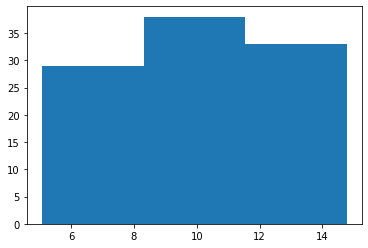

In [84]:
plt.hist(data,bins=3)

(array([ 2.,  5., 11., 11., 13., 23., 20., 10.,  3.,  2.]),
 array([ 3.61818753,  4.85986717,  6.10154682,  7.34322647,  8.58490612,
         9.82658576, 11.06826541, 12.30994506, 13.5516247 , 14.79330435,
        16.034984  ]),
 <a list of 10 Patch objects>)

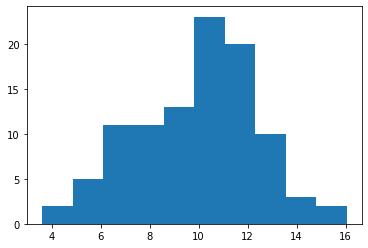

In [86]:
plt.hist(data_1)

## Histogram

In Lab 4 you are asked to write a histogram function:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    





## Alternative
* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Create a list of `bin_edges` using `arange`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `bin_edge[i]` and `bin_edge[i+1]`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    



In [ ]:
def arange(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    return out

In [ ]:
def histogram(data, n_bins=10,x_min=None, x_max=None):
                
    return hist,bin_edges

In [ ]:
#histogram(data,10,0,10)